In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#packages

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
#modules


In [ ]:
path="BankChurners.csv"
df=pd.read_csv(path,na_values="NaN")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# **Preprocessing**

In [ ]:
df=df.drop(['CLIENTNUM'],axis=1)

In [ ]:
df.shape

(10127, 20)

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [ ]:
#replace unknown with nan
df['Income_Category']=df['Income_Category'].replace("Unknown",np.nan)
df.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
#replace null value with mode value to prvent data loss
mode_income=df['Income_Category'].mode()
df['Income_Category']=df['Income_Category'].fillna(mode_income[0])
df['Income_Category'].value_counts()


,count
Income_Category,
Less than $40K,4673
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [ ]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
#checking unique values in each categorical column
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Attrition_Flag': 2,
 'Gender': 2,
 'Education_Level': 7,
 'Marital_Status': 4,
 'Income_Category': 5,
 'Card_Category': 4}

In [ ]:
#since attribution_flag and gender have two unique value we apply binary encoding

#checking the unique value in "attribution flag " column

df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
#function for binary encoding

def binary_encoding(tempdf,column,positive_value):
  tempdf=tempdf.copy()
  tempdf[column]=tempdf[column].apply(lambda x:1 if x==positive_value else 0)
  return tempdf

<Axes: xlabel='Attrition_Flag', ylabel='count'>

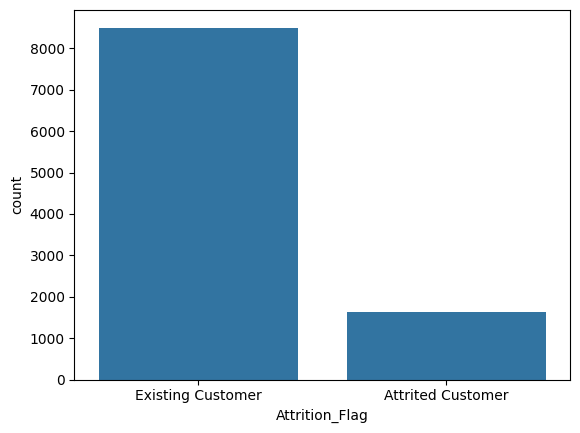

In [ ]:
#plot the count of each value in attribution flag before mapping

sns.countplot(x=df['Attrition_Flag'])

<Axes: xlabel='Attrition_Flag', ylabel='count'>

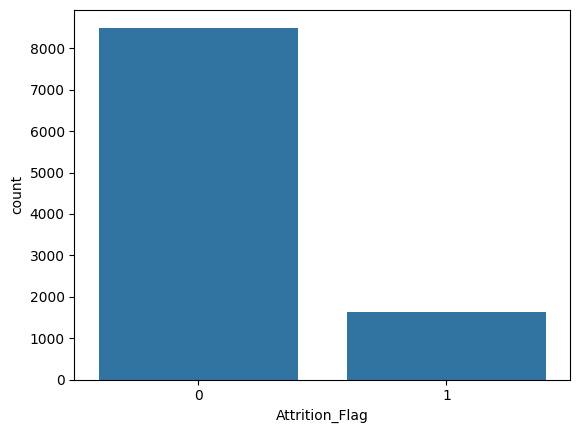

In [ ]:
#apply binary encoding in attribution flag

df=binary_encoding(df,'Attrition_Flag','Attrited Customer')
sns.countplot(x=df['Attrition_Flag'])

<Axes: xlabel='Gender', ylabel='count'>

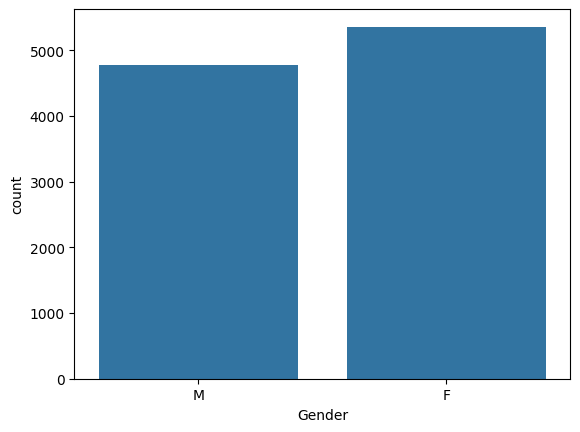

In [ ]:
#doing same for gender attribute

sns.countplot(x=df['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

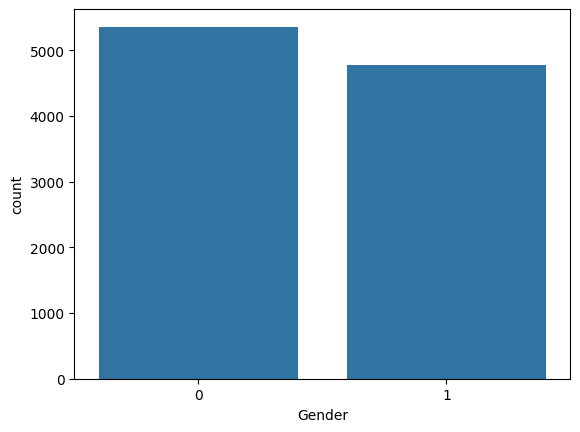

In [ ]:
df=binary_encoding(df,'Gender','M')
sns.countplot(x=df['Gender'])

In [ ]:
#checking unique values in education level column

df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
#checking unique values in marrtial status

df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [ ]:
#droping the unknowm martial status row to ensure data integrity

#replace unknown with nan
df['Marital_Status']=df['Marital_Status'].replace("Unknown",np.nan)
#drop the row
df.dropna(subset=['Marital_Status'],inplace=True)
df['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

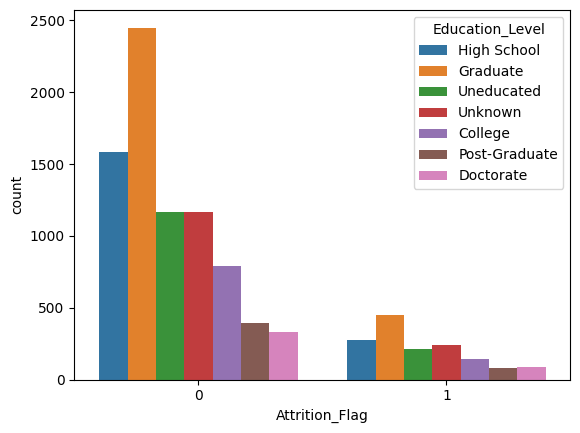

In [ ]:
sns.countplot(x="Attrition_Flag",hue="Education_Level",data=df)


In [ ]:
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,2901
High School,1859
Unknown,1405
Uneducated,1378
College,939
Post-Graduate,473
Doctorate,423


In [ ]:
#replacing unknow value in education level with mode value

#replace unknown with nan
df['Education_Level']=df['Education_Level'].replace("Unknown",np.nan)
mode_education=df['Education_Level'].mode()
df['Education_Level']=df['Education_Level'].fillna(mode_education[0])
df['Education_Level'].value_counts()


,count
Education_Level,
Graduate,4306
High School,1859
Uneducated,1378
College,939
Post-Graduate,473
Doctorate,423


In [ ]:
#checking unique values in each categorical column
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}


{'Education_Level': 6,
 'Marital_Status': 3,
 'Income_Category': 5,
 'Card_Category': 4}

In [ ]:
#update post-graduate and doctorate in others

def add_education_level(inpt):
  if inpt=='Post-Graduate' or inpt=='Doctorate':
    return 'Others'
  else:
    return inpt

In [ ]:
df['Education_Level']=df['Education_Level'].apply(add_education_level)
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,4306
High School,1859
Uneducated,1378
College,939
Others,896


In [ ]:
#one hot encoding

df=pd.get_dummies(df,columns=["Education_Level"])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Others,Education_Level_Uneducated
0,0,45,1,3,Married,$60K - $80K,Blue,39,5,1,...,1.335,1144,42,1.625,0.061,False,False,True,False,False
1,0,49,0,5,Single,Less than $40K,Blue,44,6,1,...,1.541,1291,33,3.714,0.105,False,True,False,False,False
2,0,51,1,3,Married,$80K - $120K,Blue,36,4,1,...,2.594,1887,20,2.333,0.000,False,True,False,False,False
4,0,40,1,3,Married,$60K - $80K,Blue,21,5,1,...,2.175,816,28,2.500,0.000,False,False,False,False,True
5,0,44,1,2,Married,$40K - $60K,Blue,36,3,1,...,1.376,1088,24,0.846,0.311,False,True,False,False,False


<Axes: xlabel='Attrition_Flag', ylabel='count'>

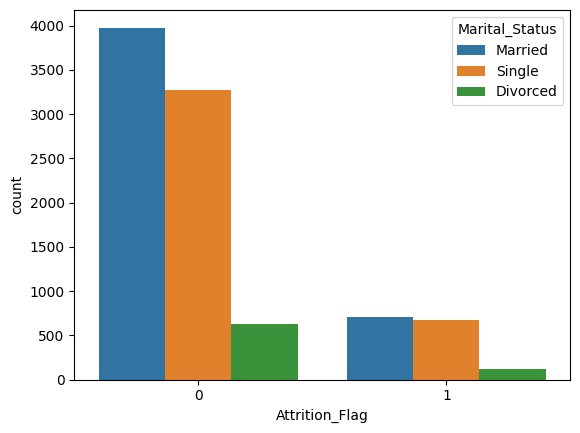

In [ ]:
#using seaborn to create a countplot showing relationship between "Attrition flag " and "marital status"
sns.countplot(x="Attrition_Flag",hue="Marital_Status",data=df)

In [ ]:
#apply one hot endoing in marital status as well
df=pd.get_dummies(df,columns=["Marital_Status"])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Others,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,45,1,3,$60K - $80K,Blue,39,5,1,3,...,1.625,0.061,False,False,True,False,False,False,True,False
1,0,49,0,5,Less than $40K,Blue,44,6,1,2,...,3.714,0.105,False,True,False,False,False,False,False,True
2,0,51,1,3,$80K - $120K,Blue,36,4,1,0,...,2.333,0.000,False,True,False,False,False,False,True,False
4,0,40,1,3,$60K - $80K,Blue,21,5,1,0,...,2.500,0.000,False,False,False,False,True,False,True,False
5,0,44,1,2,$40K - $60K,Blue,36,3,1,2,...,0.846,0.311,False,True,False,False,False,False,True,False


In [ ]:
#preprocessing "income_category"

def preprocess_income_category(inpt):
  income_map={"Less than $40K": 0,"$40K - $60K":1,"$60K - $80K":2,"$80K - $120K":3,"$120K +":4}

  inpt['Income_Category']=inpt['Income_Category'].apply(lambda x:income_map[x])
  return inpt

In [ ]:
df=preprocess_income_category(df)


In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Others,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,45,1,3,2,Blue,39,5,1,3,...,1.625,0.061,False,False,True,False,False,False,True,False
1,0,49,0,5,0,Blue,44,6,1,2,...,3.714,0.105,False,True,False,False,False,False,False,True
2,0,51,1,3,3,Blue,36,4,1,0,...,2.333,0.000,False,True,False,False,False,False,True,False
4,0,40,1,3,2,Blue,21,5,1,0,...,2.500,0.000,False,False,False,False,True,False,True,False
5,0,44,1,2,1,Blue,36,3,1,2,...,0.846,0.311,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,0,56,0,1,0,Blue,50,4,1,4,...,0.791,0.164,False,True,False,False,False,False,False,True
10122,0,50,1,2,1,Blue,40,3,2,3,...,0.857,0.462,False,True,False,False,False,False,False,True
10123,1,41,1,2,1,Blue,25,4,2,3,...,0.683,0.511,False,True,False,False,False,True,False,False
10124,1,44,0,1,0,Blue,36,5,3,4,...,0.818,0.000,False,False,True,False,False,False,True,False


In [ ]:
df['Card_Category'].value_counts()

,count
Card_Category,
Blue,8753
Silver,503
Gold,104
Platinum,18


In [ ]:
def preprocess_card_category(data):
  data=pd.get_dummies(data,columns=["Card_Category"])
  return data

In [ ]:
df=preprocess_card_category(df)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_High School,Education_Level_Others,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,2,39,5,1,3,12691.0,...,True,False,False,False,True,False,True,False,False,False
1,0,49,0,5,0,44,6,1,2,8256.0,...,False,False,False,False,False,True,True,False,False,False
2,0,51,1,3,3,36,4,1,0,3418.0,...,False,False,False,False,True,False,True,False,False,False
4,0,40,1,3,2,21,5,1,0,4716.0,...,False,False,True,False,True,False,True,False,False,False
5,0,44,1,2,1,36,3,1,2,4010.0,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,0,56,0,1,0,50,4,1,4,3688.0,...,False,False,False,False,False,True,True,False,False,False
10122,0,50,1,2,1,40,3,2,3,4003.0,...,False,False,False,False,False,True,True,False,False,False
10123,1,41,1,2,1,25,4,2,3,4277.0,...,False,False,False,True,False,False,True,False,False,False
10124,1,44,0,1,0,36,5,3,4,5409.0,...,True,False,False,False,True,False,True,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attrition_Flag               9378 non-null   int64  
 1   Customer_Age                 9378 non-null   int64  
 2   Gender                       9378 non-null   int64  
 3   Dependent_count              9378 non-null   int64  
 4   Income_Category              9378 non-null   int64  
 5   Months_on_book               9378 non-null   int64  
 6   Total_Relationship_Count     9378 non-null   int64  
 7   Months_Inactive_12_mon       9378 non-null   int64  
 8   Contacts_Count_12_mon        9378 non-null   int64  
 9   Credit_Limit                 9378 non-null   float64
 10  Total_Revolving_Bal          9378 non-null   int64  
 11  Avg_Open_To_Buy              9378 non-null   float64
 12  Total_Amt_Chng_Q4_Q1         9378 non-null   float64
 13  Total_Trans_Amt       

In [ ]:
#replce all value of bool into int
for column in df.columns[17:29]:  # Iterate through columns 17 to 28 (inclusive)
    df[column] = df[column].astype(int)  # Convert the column to integer type

df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attrition_Flag               9378 non-null   int64  
 1   Customer_Age                 9378 non-null   int64  
 2   Gender                       9378 non-null   int64  
 3   Dependent_count              9378 non-null   int64  
 4   Income_Category              9378 non-null   int64  
 5   Months_on_book               9378 non-null   int64  
 6   Total_Relationship_Count     9378 non-null   int64  
 7   Months_Inactive_12_mon       9378 non-null   int64  
 8   Contacts_Count_12_mon        9378 non-null   int64  
 9   Credit_Limit                 9378 non-null   float64
 10  Total_Revolving_Bal          9378 non-null   int64  
 11  Avg_Open_To_Buy              9378 non-null   float64
 12  Total_Amt_Chng_Q4_Q1         9378 non-null   float64
 13  Total_Trans_Amt       

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_High School,Education_Level_Others,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,2,39,5,1,3,12691.0,...,1,0,0,0,1,0,1,0,0,0
1,0,49,0,5,0,44,6,1,2,8256.0,...,0,0,0,0,0,1,1,0,0,0
2,0,51,1,3,3,36,4,1,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,1,3,2,21,5,1,0,4716.0,...,0,0,1,0,1,0,1,0,0,0
5,0,44,1,2,1,36,3,1,2,4010.0,...,0,0,0,0,1,0,1,0,0,0


# **Separating dependent and independent variables**

In [ ]:
#independent variables

x=df.drop(['Attrition_Flag'],axis=1)

#dependent variable
y=df['Attrition_Flag']


In [ ]:
#scale x with standard scaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Others,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.171193,1.063656,0.514586,0.600185,0.374602,0.764179,-1.331567,0.488275,0.455836,-0.474397,...,2.011131,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
1,0.322715,-0.940154,2.052686,-0.884721,0.996332,1.409982,-1.331567,-0.413111,-0.034375,-0.367533,...,-0.497233,-0.325016,-0.415030,-0.294405,-0.999574,1.174049,0.267215,-0.105897,-0.043853,-0.238067
2,0.569669,1.063656,0.514586,1.342638,0.001565,0.118377,-1.331567,-2.215883,-0.569131,-1.428794,...,-0.497233,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
3,-0.788578,1.063656,0.514586,0.600185,-1.863625,0.764179,-1.331567,-2.215883,-0.425660,-1.428794,...,-0.497233,-0.325016,2.409464,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
4,-0.294670,1.063656,-0.254464,-0.142268,0.001565,-0.527426,-1.331567,-0.413111,-0.503696,0.102910,...,-0.497233,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,1.187054,-0.940154,-1.023514,-0.884721,1.742408,0.118377,-1.331567,1.389661,-0.539287,-0.684438,...,-0.497233,-0.325016,-0.415030,-0.294405,-0.999574,1.174049,0.267215,-0.105897,-0.043853,-0.238067
9374,0.446192,1.063656,-0.254464,-0.142268,0.498948,-0.527426,-0.339792,0.488275,-0.504469,0.844809,...,-0.497233,-0.325016,-0.415030,-0.294405,-0.999574,1.174049,0.267215,-0.105897,-0.043853,-0.238067
9375,-0.665101,1.063656,-0.254464,-0.142268,-1.366241,0.118377,-0.339792,0.488275,-0.474183,1.256294,...,-0.497233,-0.325016,-0.415030,3.396680,-0.999574,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
9376,-0.294670,-0.940154,-1.023514,-0.884721,0.001565,0.764179,0.651983,1.389661,-0.349061,-1.428794,...,2.011131,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067


In [ ]:
y


,Attrition_Flag
0,0
1,0
2,0
4,0
5,0
...,...
10121,0
10122,0
10123,1
10124,1


# **Training**

In [ ]:
#splitting the dataset for training and testing

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123)

In [ ]:
#printing shape after splitting

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7502, 28) (1876, 28) (7502,) (1876,)


In [ ]:
#defing the models
models=[
        LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier()
]

for model in models:
  model.fit(x_train,y_train)


In [ ]:
#printing the accuracy  of diffrent models

model_names=[
             "Logistic Regression",
             "Support Vector Machine",
             "Decision Tree",
             "Random Forest"
]

for model,name in zip(models,model_names):
  print(name+':'+str(model.score(x_test,y_test)))

Logistic Regression:0.8949893390191898
Support Vector Machine:0.9221748400852878
Decision Tree:0.9349680170575693
Random Forest:0.9584221748400853


In [ ]:
import pickle

#defing the models
models=[
        LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier()
]

for model in models:
  model.fit(x_train,y_train)

# Get the RandomForestClassifier from the models list
model_rf = models[-1]  # The last element is the RandomForestClassifier

# Now you can pickle it
pickle.dump(model_rf, open('model_creditcard.pkl', 'wb'))